<a href="https://colab.research.google.com/github/CarlosBaez11/RetoTecnologico-Eafit/blob/main/Copia_de_ProyectoTecnologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/CarlosBaez11/RetoTecnologico-Eafit.git

Cloning into 'RetoTecnologico-Eafit'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 12.33 MiB | 17.91 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [3]:
data=pd.read_excel("/content/RetoTecnologico-Eafit/Caso 01 - Cobranza Sector Financiero.xlsx")

In [4]:
print(data.columns)
print(data.dtypes)
print(data.shape)

Index(['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento',
       'Tipo De Producto', 'PRODUCTO', 'Valor Obligacion', 'Valor Vencido',
       'Regional', 'REGION', 'Abogado', 'Dias Mora', 'FRANJA',
       'Fecha Traslado Para Cobro', 'Fecha Ultima Facturacion', 'Segmento',
       'Oficina Radicacion', 'Red', 'Cuadrante', 'Descripcion Causal',
       'Calificacion Real', 'Fecha De Perfeccionamiento', 'Endeudamiento',
       'Rango endeudamiento', 'Sector Economico', 'Profesion', 'Ocupacion'],
      dtype='object')
Consecutivo Documento Deudor             int64
Nit                                      int64
Nombres                                float64
Numero Documento                       float64
Tipo De Producto                         int64
PRODUCTO                                object
Valor Obligacion                       float64
Valor Vencido                          float64
Regional                                 int64
REGION                                  

In [5]:
data.head(5)

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,28768192,18,NaN,NaN,3,TARJETAS DE CREDITO,5637605.0,152093.0,2099,BOGOTA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,2,1978-12-06,5637605.0,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO
1,2712044,22,NaN,NaN,5,CONSUMO,40584.0,40584.0,2099,BOGOTA,...,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,2015-03-11,40584.0,<1M,NaN,SIN PROFESION,SIN OFICIO
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,2015-01-01 00:00:00,NaN,SIN PROFESION,JUBILADO
3,23479925,46,NaN,NaN,3,TARJETAS DE CREDITO,5904653.0,1455631.0,2099,BOGOTA,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,1990-09-01,5904653.0,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA


<Axes: >

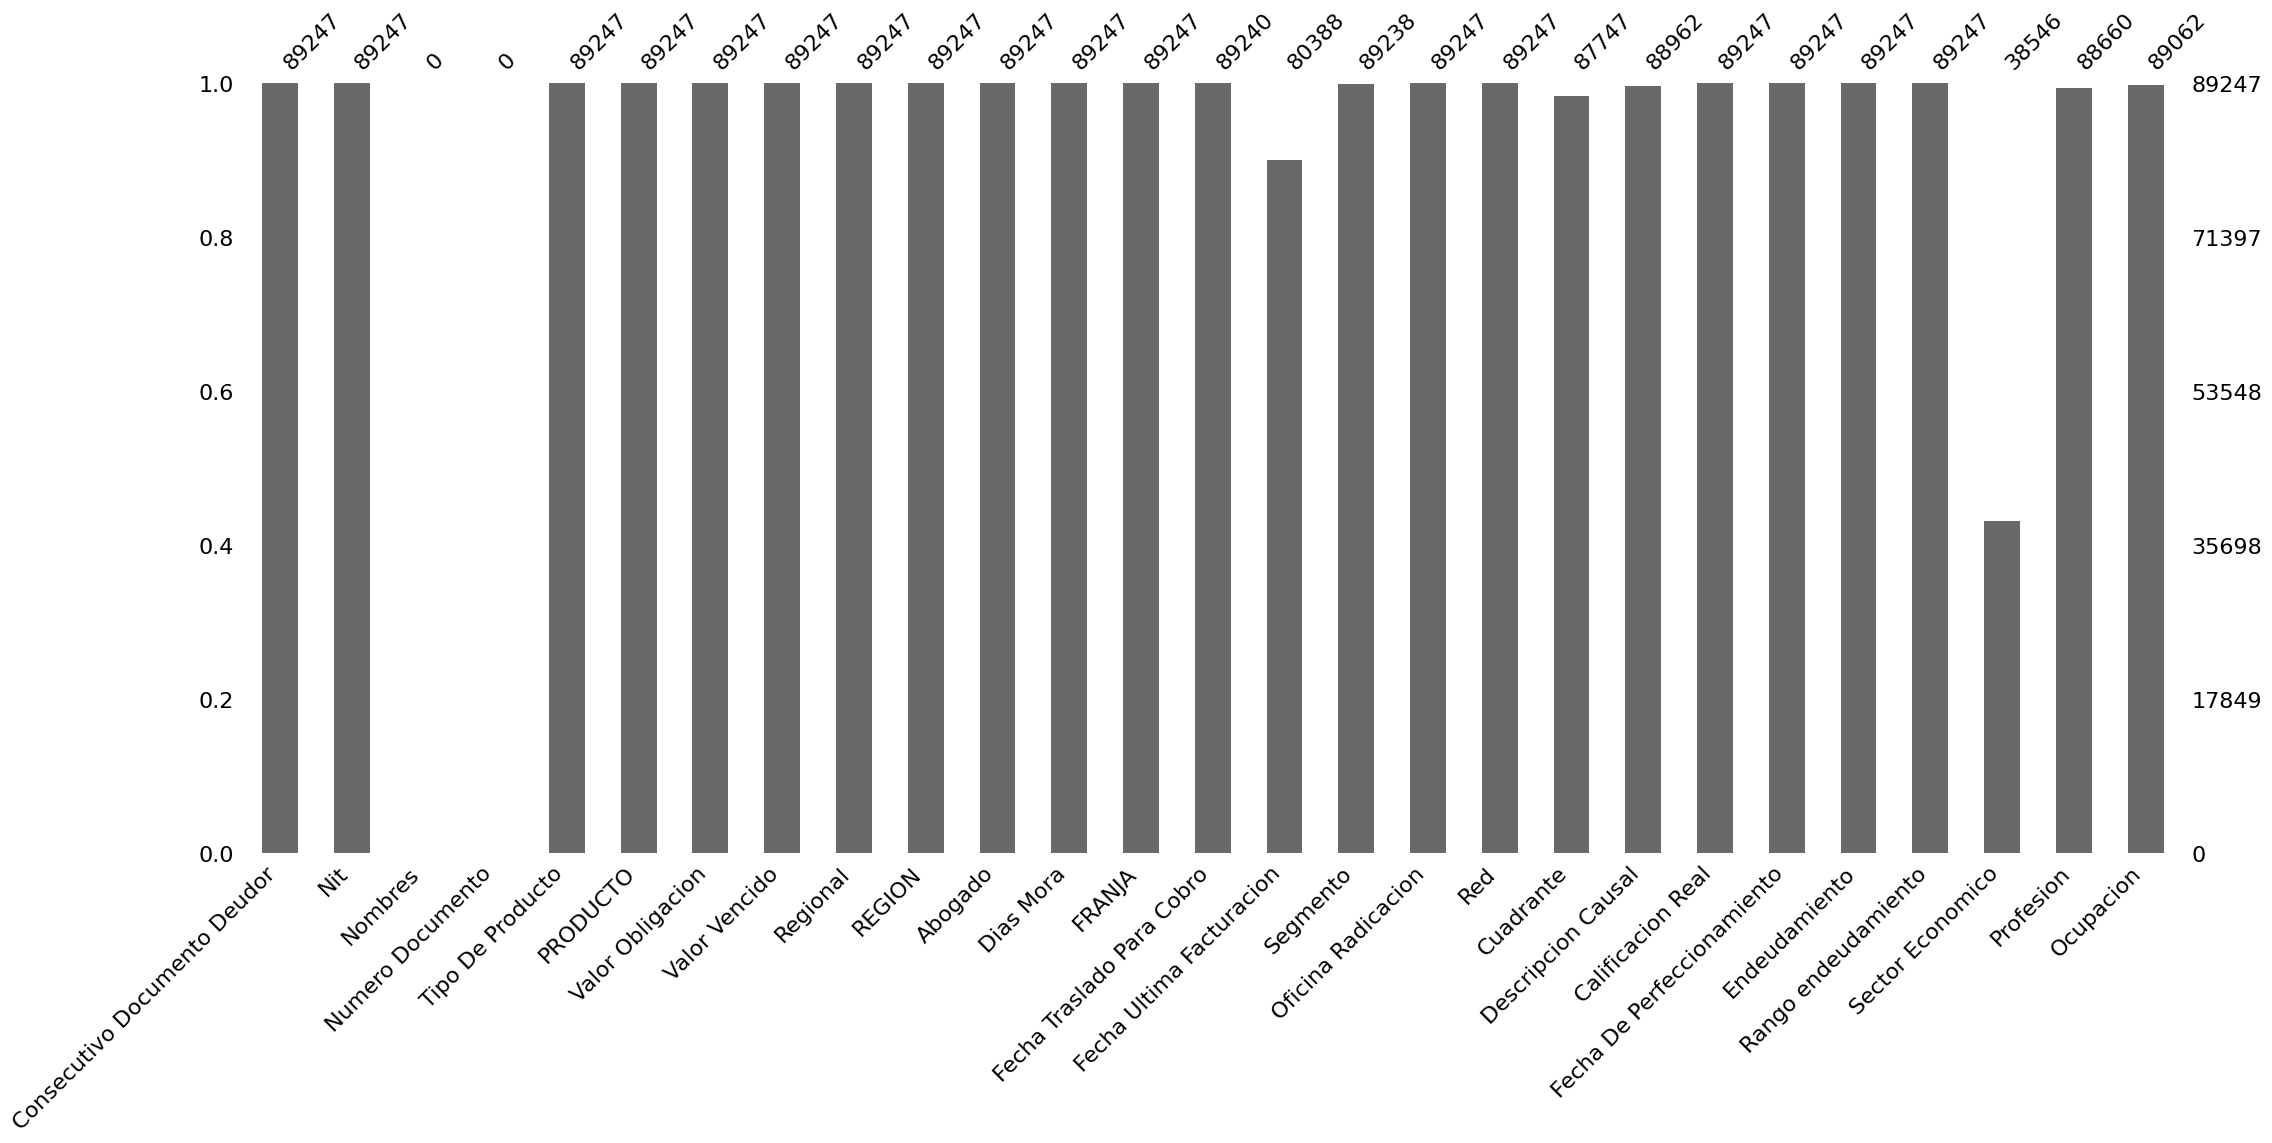

In [6]:
import missingno as msn
msn.bar(data)

In [33]:
data.drop(columns="Nombres", axis=1, inplace=True)
data.drop(columns="Numero Documento", axis=1, inplace=True)
data.drop(columns="Sector Economico", axis=1, inplace=True)


KeyError: ignored

In [36]:
data.dropna(inplace=True)

<Axes: >

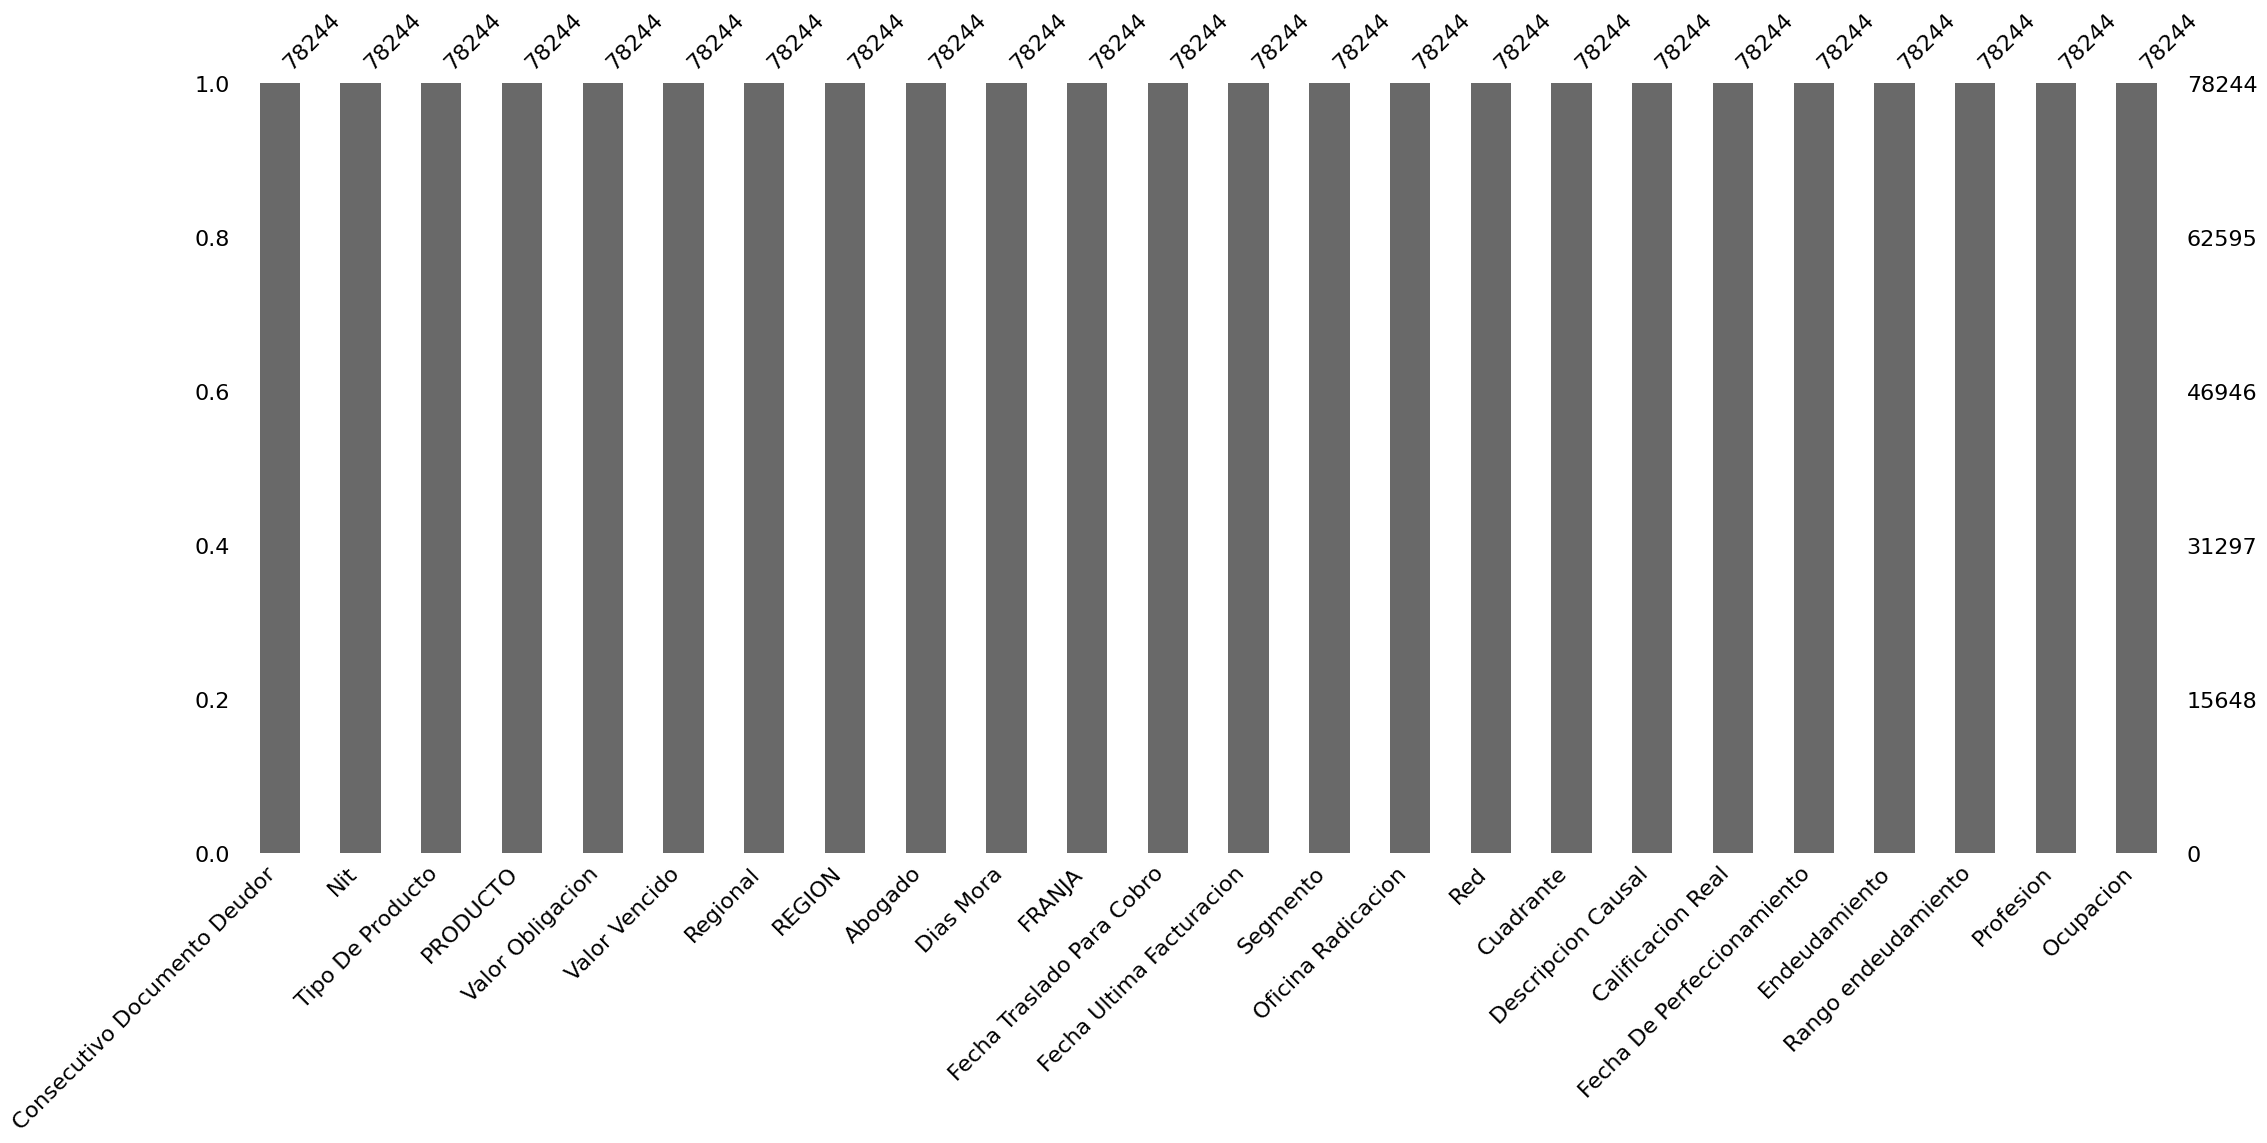

In [37]:

msn.bar(data)

In [42]:
data.drop(columns="Tipo De Producto", axis=1, inplace=True)

In [23]:
data["Rango endeudamiento"].value_counts()

2015-01-01 00:00:00    45695
15-50                  19141
<1M                    18903
50-100                  4341
100-200                  919
>200                     248
Name: Rango endeudamiento, dtype: int64

In [18]:
data["PRODUCTO"].value_counts()

TARJETAS DE CREDITO    51864
CONSUMO                19624
CH PROPIA               8720
VEHICULOS SUFI          5957
MASIVO SUFI             2942
CH TITU                  140
Name: PRODUCTO, dtype: int64

In [26]:
data["Fecha Ultima Facturacion"].value_counts()

2015-06-26 00:00:00    30700
2015-06-19 00:00:00    24221
2015-06-25 00:00:00    11910
0001-01-01 BC           2195
2015-05-29 00:00:00     1383
                       ...  
2015-02-02 00:00:00        1
2015-05-23 00:00:00        1
2015-04-08 00:00:00        1
2015-03-28 00:00:00        1
2015-02-19 00:00:00        1
Name: Fecha Ultima Facturacion, Length: 201, dtype: int64

In [28]:
data['Dias Mora'].describe()

count    89247.000000
mean        47.099320
std         70.105525
min          1.000000
25%         26.000000
50%         30.000000
75%         46.000000
max       2175.000000
Name: Dias Mora, dtype: float64

In [30]:
data['Valor Obligacion'].describe()

count    8.924700e+04
mean     7.069210e+06
std      1.519014e+07
min      1.804400e+04
25%      7.655165e+05
50%      1.927124e+06
75%      5.812533e+06
max      6.713357e+08
Name: Valor Obligacion, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbcc368a500>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbcc368aa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbcc368a260>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbcc368af80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbcc368b220>],
 'means': []}

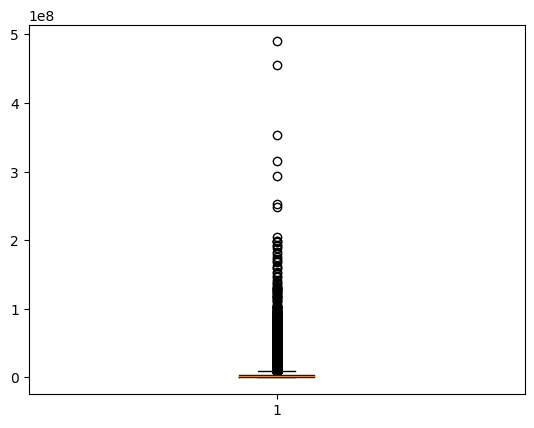

In [40]:
plt.boxplot(data['Valor Obligacion'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbcc3710340>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbcc3710760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbcc37100a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbcc3710ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbcc3710f40>],
 'means': []}

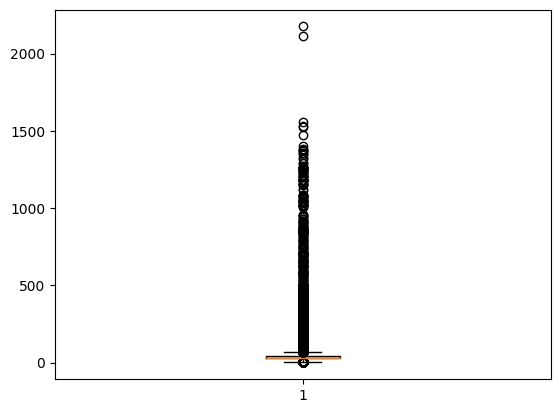

In [41]:
plt.boxplot(data['Dias Mora'])

In [44]:
## se elimina columna region ya que en el codigo "regional" la columba region se encuentra implicito y evitar problemas de multicolinealidad

data.drop(columns="REGION", axis=1, inplace=True)

In [45]:
data["Descripcion Causal"].value_counts()
#que hacer con un desbalance de datos tan grande?

DESCUIDO                                             21807
SIN CAUSAL DE MORA                                   20045
CUENTAS POR COBRAR                                    6664
CALAMIDAD                                             3411
RETRASO EN PAGO DE SALARIO                            3106
INGRESOS INSUFICIENTES                                2937
DESEMPLEADO TITULAR Y/O COTITULAR                     2726
PAGO NO APLICADO                                      2660
DISMINUCION DE SALARIO y/o INGRESOS                   2637
PAGO NO APLICADO O MAL APLICADO                       1825
NO COINCIDE FECHA VENCIMIENTO CON INGRESOS            1447
EXTRACTO NO ENTREGADO                                 1332
SOBREENDEUDAMIENTO                                    1273
CLIENTE NO INFORMA CAUSAL                              891
PAGO OTRAS DEUDAS                                      831
VIAJE                                                  660
ACOSTUMBRA A PAGAR ATRASADO                            5

In [ ]:
# Especificamos tamaño de la figura
plt.figure(figsize=(20,10))

#Ejecutamos la correlación entre las variables
correlacion = data.corr()

#Gráfica de correlación heatmap

mask = np.triu(np.ones_like(correlacion, dtype=np.bool))
heatmap = sns.heatmap(correlacion, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Gráfico de correlación', fontdict={'fontsize':18}, pad=16);